# Installation of required libraries and basic setup

In [2]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
import tensorflow as tf

# Testing the dataset 

In [3]:
# Testing the dataset 
path_single = r"/home/dieudo/Projects/landslide/dataIm/Data/img/image_16.h5"
path_single_mask = r'/home/dieudo/Projects/landslide/dataIm/Data/mask/mask_16.h5'

ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


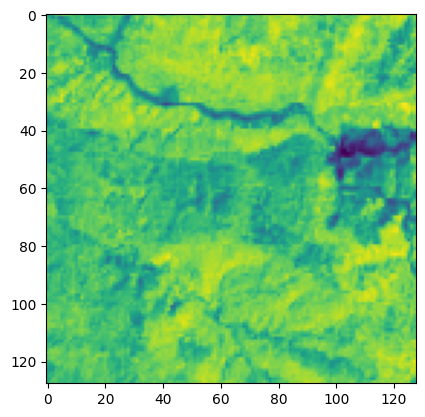

In [4]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


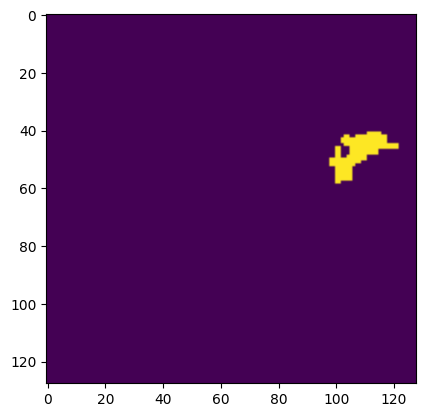

In [5]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

# Using all dataset

In [6]:
path_single = r"/home/dieudo/Projects/landslide/dataIm/Data/img/image_10.h5"
path_single_mask = r"/home/dieudo/Projects/landslide/dataIm/Data/mask/mask_1.h5"
TRAIN_PATH = r"/home/dieudo/Projects/landslide/dataIm/Data/img/*.h5"
TRAIN_MASK = r"/home/dieudo/Projects/landslide/dataIm/Data/mask/*.h5"

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

## Train with RGB, NDVI, DEM, and Slope 


In [7]:
#testing for google colab GPU
import tensorflow as tf
tf.test.gpu_device_name()

2025-01-03 15:52:43.346217: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-03 15:52:43.349959: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-03 15:52:43.350094: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

'/device:GPU:0'

In [8]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data
    

0 /home/dieudo/Projects/landslide/dataIm/Data/img/image_1.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_1.h5
1 /home/dieudo/Projects/landslide/dataIm/Data/img/image_10.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_10.h5
2 /home/dieudo/Projects/landslide/dataIm/Data/img/image_100.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_100.h5
3 /home/dieudo/Projects/landslide/dataIm/Data/img/image_1000.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_1000.h5
4 /home/dieudo/Projects/landslide/dataIm/Data/img/image_1001.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_1001.h5
5 /home/dieudo/Projects/landslide/dataIm/Data/img/image_1002.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_1002.h5
6 /home/dieudo/Projects/landslide/dataIm/Data/img/image_1003.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_1003.h5
7 /home/dieudo/Projects/landslide/dataIm/Data/img/image_1004.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_1004.h5
8 /h

/tmp/ipykernel_40164/3444182847.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1692 /home/dieudo/Projects/landslide/dataIm/Data/img/image_2521.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_2521.h5
1693 /home/dieudo/Projects/landslide/dataIm/Data/img/image_2522.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_2522.h5
1694 /home/dieudo/Projects/landslide/dataIm/Data/img/image_2523.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_2523.h5
1695 /home/dieudo/Projects/landslide/dataIm/Data/img/image_2524.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_2524.h5
1696 /home/dieudo/Projects/landslide/dataIm/Data/img/image_2525.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_2525.h5
1697 /home/dieudo/Projects/landslide/dataIm/Data/img/image_2526.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_2526.h5
1698 /home/dieudo/Projects/landslide/dataIm/Data/img/image_2527.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_2527.h5
1699 /home/dieudo/Projects/landslide/dataIm/Data/img/image_2528.h5 /home/dieudo/Projects/landslid

/tmp/ipykernel_40164/3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2272 /home/dieudo/Projects/landslide/dataIm/Data/img/image_3043.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_3043.h5
2273 /home/dieudo/Projects/landslide/dataIm/Data/img/image_3044.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_3044.h5
2274 /home/dieudo/Projects/landslide/dataIm/Data/img/image_3045.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_3045.h5
2275 /home/dieudo/Projects/landslide/dataIm/Data/img/image_3046.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_3046.h5
2276 /home/dieudo/Projects/landslide/dataIm/Data/img/image_3047.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_3047.h5
2277 /home/dieudo/Projects/landslide/dataIm/Data/img/image_3048.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_3048.h5
2278 /home/dieudo/Projects/landslide/dataIm/Data/img/image_3049.h5 /home/dieudo/Projects/landslide/dataIm/Data/mask/mask_3049.h5
2279 /home/dieudo/Projects/landslide/dataIm/Data/img/image_305.h5 /home/dieudo/Projects/landslide

## Testing min, max values in train data

In [9]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


## Custom loss function (Dice Loss)

In [10]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

## Visualization of the training data

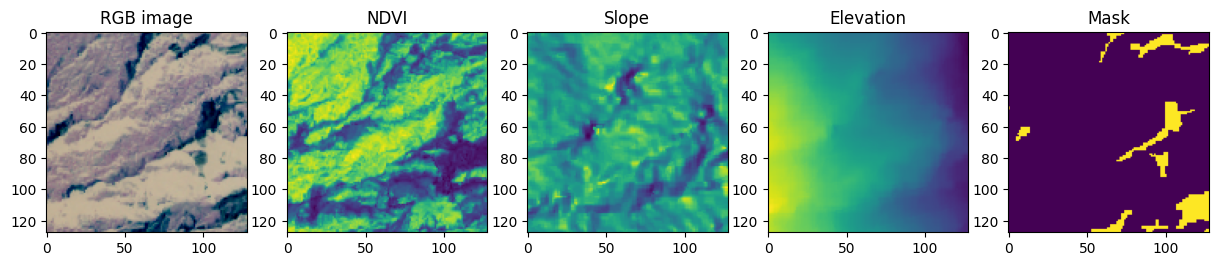

In [11]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

## Validation split

In [12]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

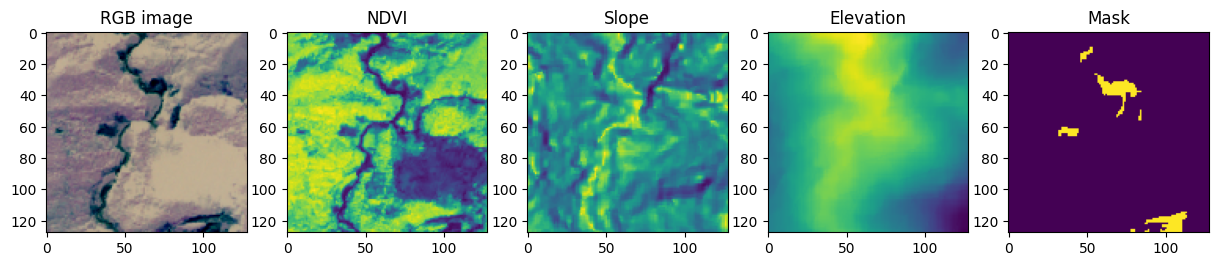

In [13]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [14]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [15]:
# to release some memory, delete the unnecessary variable
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask 

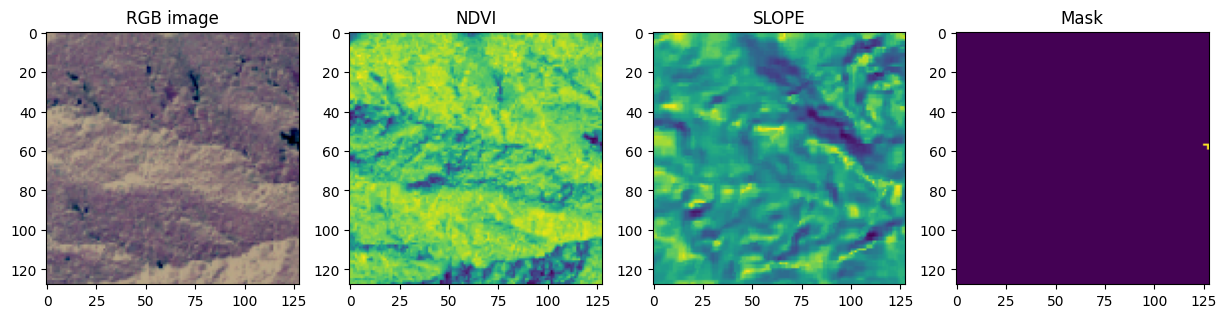

In [16]:
img=1540
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

# Unet Model

In [17]:
from utils.utils import recall_m, precision_m, f1_m
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model

In [18]:
model = unet_model(128, 128, 6)
# model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.keras", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    # earlyStopping,
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=16,  
          epochs=100, 
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("model_save.keras")

2025-01-03 15:53:59.911379: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-03 15:53:59.911548: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-03 15:53:59.911620: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/100


2025-01-03 15:54:03.699124: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2025-01-03 15:54:04.009850: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2025-01-03 15:54:06.469972: I external/local_xla/xla/service/service.cc:168] XLA service 0x793dc5002680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-03 15:54:06.469994: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-01-03 15:54:06.473931: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735894446.547684   40594 device_compiler.h:186] Compiled cluste


Epoch 1: val_f1_m improved from -inf to 0.47755, saving model to best_model.keras
190/190 - 39s - loss: 0.0777 - accuracy: 0.9767 - f1_m: 0.1508 - precision_m: 0.3940 - recall_m: 0.1168 - val_loss: 0.0468 - val_accuracy: 0.9834 - val_f1_m: 0.4776 - val_precision_m: 0.7438 - val_recall_m: 0.3621 - 39s/epoch - 204ms/step
Epoch 2/100

Epoch 2: val_f1_m improved from 0.47755 to 0.50859, saving model to best_model.keras
190/190 - 11s - loss: 0.0439 - accuracy: 0.9837 - f1_m: 0.5755 - precision_m: 0.7018 - recall_m: 0.5148 - val_loss: 0.0405 - val_accuracy: 0.9850 - val_f1_m: 0.5086 - val_precision_m: 0.8392 - val_recall_m: 0.3716 - 11s/epoch - 57ms/step
Epoch 3/100

Epoch 3: val_f1_m improved from 0.50859 to 0.60328, saving model to best_model.keras
190/190 - 11s - loss: 0.0398 - accuracy: 0.9850 - f1_m: 0.6037 - precision_m: 0.7523 - recall_m: 0.5265 - val_loss: 0.0365 - val_accuracy: 0.9864 - val_f1_m: 0.6033 - val_precision_m: 0.7561 - val_recall_m: 0.5110 - 11s/epoch - 56ms/step
Epoch 

In [19]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.032752636820077896 0.988584041595459 0.719343364238739 0.7689782977104187 0.6796035766601562


# Prediction

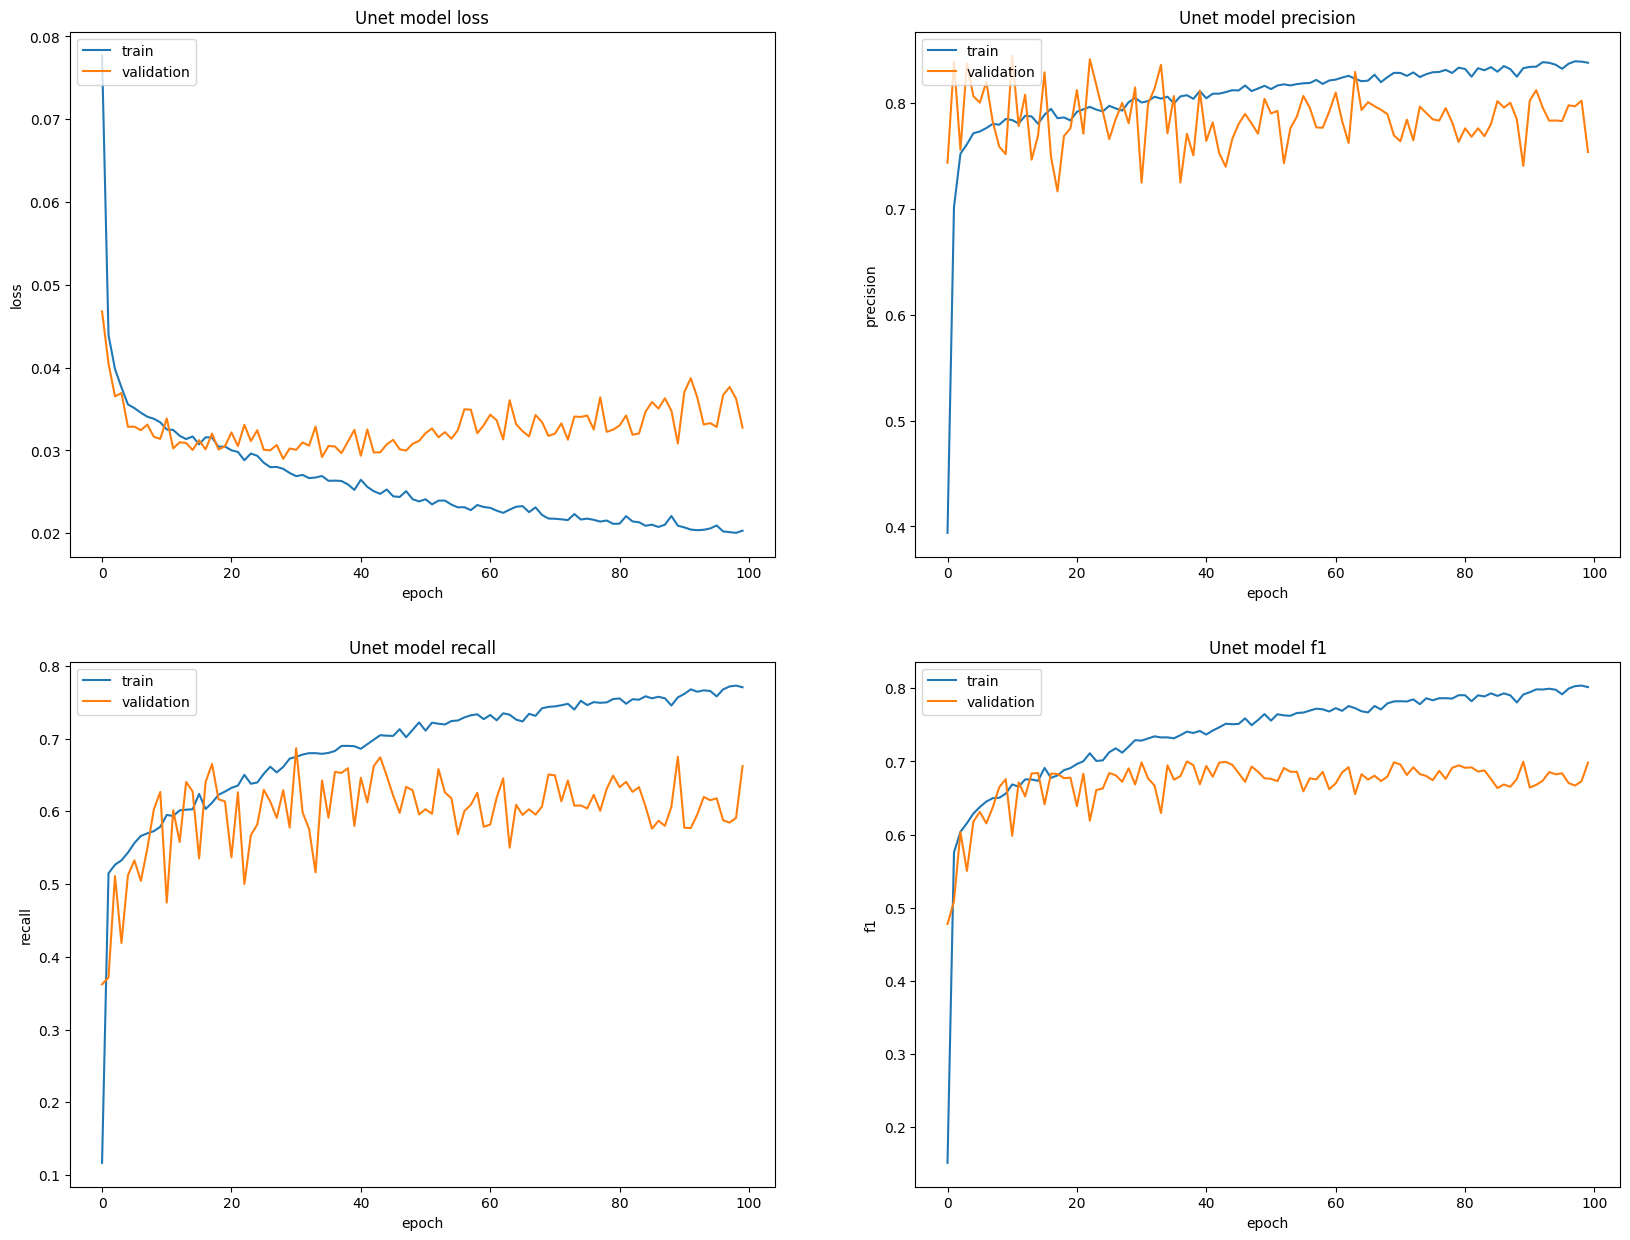

In [20]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [26]:
threshold = 0.3
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 [==============================] - 1s 21ms/step


Text(0.5, 1.0, 'Training Image')

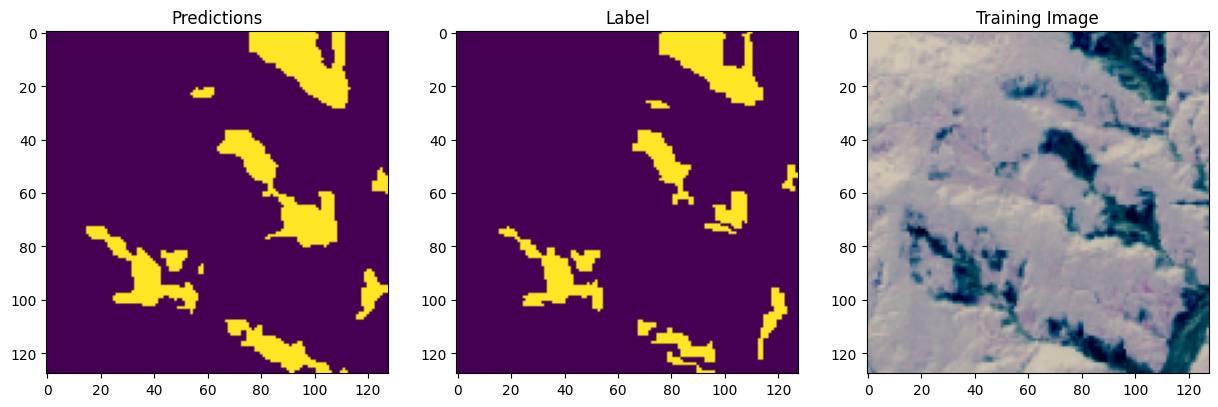

In [29]:
img = 154
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

# Validation data 

In [33]:
validation_url = r'/home/dieudo/Projects/landslide/dataIm/ValidData/img/*.h5'
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_1.h5
1 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_10.h5
2 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_100.h5
3 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_101.h5
4 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_102.h5
5 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_103.h5
6 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_104.h5
7 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_105.h5
8 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_106.h5
9 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_107.h5
10 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_108.h5
11 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_109.h5
12 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_11.h5
13 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_110.h5
14 /home/dieudo/Projects/landslide/dataIm/ValidD

/tmp/ipykernel_40164/3246105199.py:24: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


163 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_25.h5
164 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_26.h5
165 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_27.h5
166 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_28.h5
167 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_29.h5
168 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_3.h5
169 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_30.h5
170 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_31.h5
171 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_32.h5
172 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_33.h5
173 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_34.h5
174 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_35.h5
175 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_36.h5
176 /home/dieudo/Projects/landslide/dataIm/ValidData/img/image_37.h5
177 /home/dieudo/Projects/landslide

## Prediction for validation data

In [34]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 [==============================] - 2s 225ms/step


(245, 128, 128, 1)

## Visualization of validation image

Text(0.5, 1.0, 'Training Image')

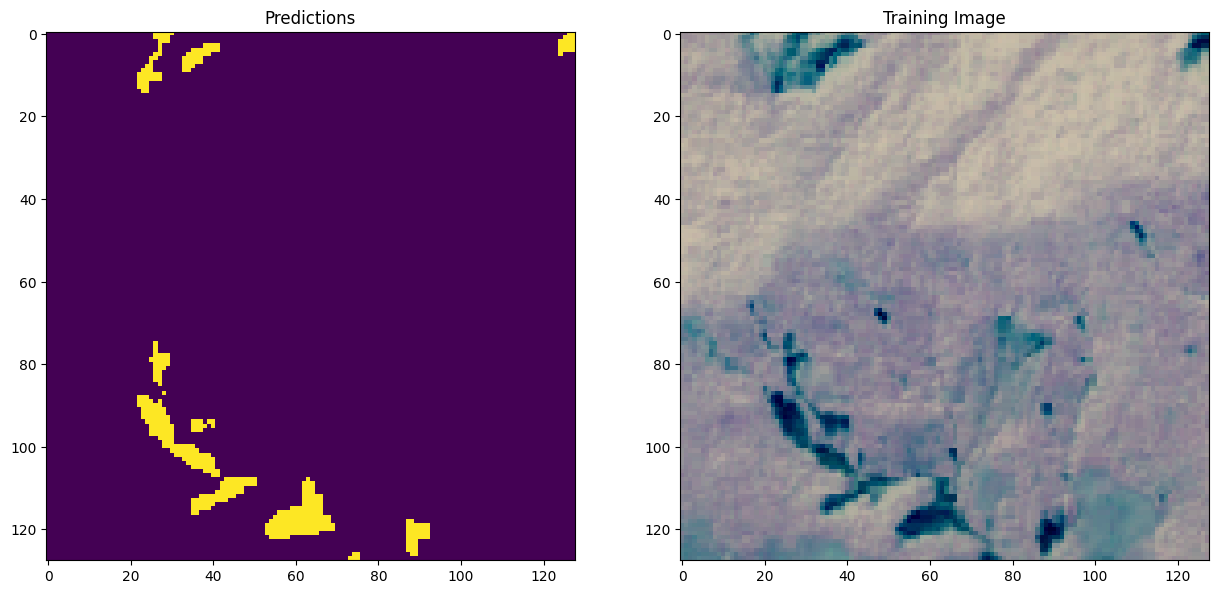

In [35]:
img = 167
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

In [37]:
write_directory = r'/home/dieudo/Projects/landslide/dataIm/ValidData/mask'
for i, name in enumerate(mask_name):
  h5f = h5py.File(write_directory + "/" + name, 'w')
  # change the dimention of prediction to (n, 128, 128)
  pred_mask = pred_img[i, :, :, 0]

  # write to the directory
  h5f.create_dataset('mask', data = pred_mask)
  h5f.close()

# Test avec image

Modèle chargé avec succès.
Image d'entrée shape: (128, 128, 3)
Nouvelle forme d'entrée : (1, 128, 128, 6)


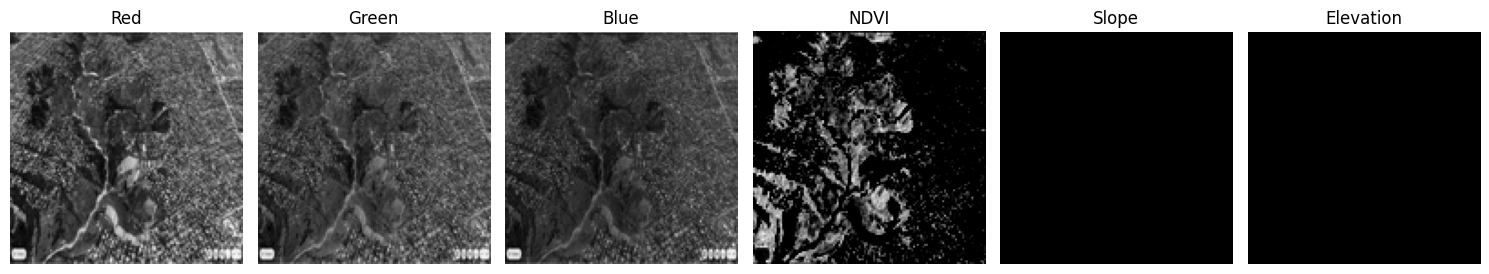

1/1 [==============================] - 0s 139ms/step


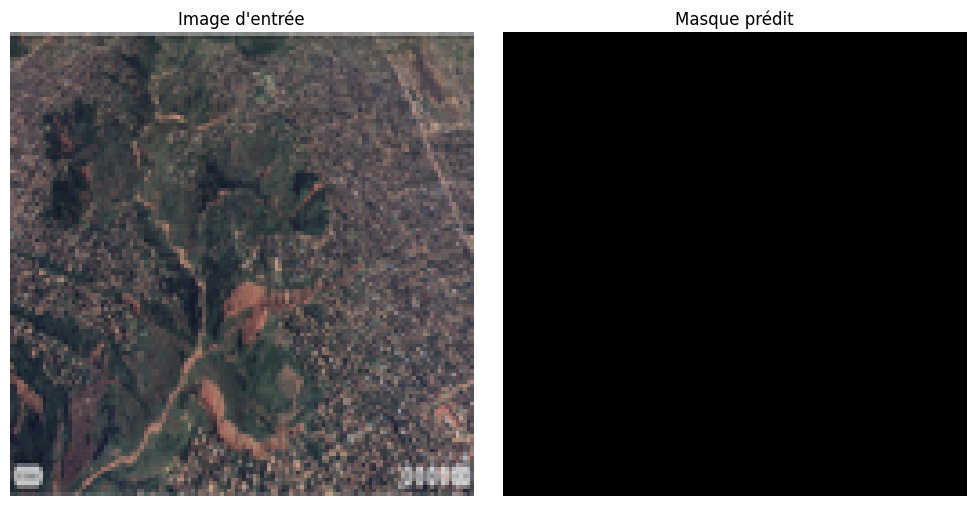

Valeurs min/max de la prédiction avant seuil: 1.0116151e-09 0.007289477


In [50]:
import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# **Définir les métriques personnalisées**
@tf.keras.utils.register_keras_serializable()
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

@tf.keras.utils.register_keras_serializable()
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

@tf.keras.utils.register_keras_serializable()
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

# **Charger le modèle avec les fonctions personnalisées**
model_path = "/home/dieudo/Projects/landslide/best_model.keras"
model = tf.keras.models.load_model(
    model_path,
    custom_objects={"recall_m": recall_m, "precision_m": precision_m, "f1_m": f1_m}
)
print("Modèle chargé avec succès.")

# **Charger une image JPG**
image_path = "/home/dieudo/Projects/landslide/imageTest/imsat2.png"
image = Image.open(image_path).convert("RGB")
image = image.resize((128, 128))  # Redimensionner à 128x128
image_array = np.array(image) / 255.0  # Normaliser entre 0 et 1
print("Image d'entrée shape:", image_array.shape)  # (128, 128, 3)

# **Simuler les canaux NDVI, Slope et Elevation**
# NDVI = (NIR - RED) / (NIR + RED), ici NIR est inconnu, on peut utiliser des heuristiques simples
ndvi = (image_array[:, :, 1] - image_array[:, :, 0]) / (
    image_array[:, :, 1] + image_array[:, :, 0] + 1e-6
)
ndvi = np.clip(ndvi, 0, 1)  # Assurez-vous que NDVI est dans [0, 1]
ndvi = np.expand_dims(ndvi, axis=-1)

# Slope et Elevation (constantes ou valeurs estimées)
slope = np.ones((128, 128, 1)) * 0.5  # Canal constant
elevation = np.ones((128, 128, 1)) * 0.5  # Canal constant

# **Combiner les canaux (RGB + NDVI + Slope + Elevation)**
input_image = np.concatenate([image_array, ndvi, slope, elevation], axis=-1)
input_image = np.expand_dims(input_image, axis=0)  # Ajouter une dimension batch
print("Nouvelle forme d'entrée :", input_image.shape)  # (1, 128, 128, 6)

# **Visualiser les canaux générés**
plt.figure(figsize=(15, 5))
titles = ["Red", "Green", "Blue", "NDVI", "Slope", "Elevation"]
channels = [image_array[:, :, 0], image_array[:, :, 1], image_array[:, :, 2], ndvi[:, :, 0], slope[:, :, 0], elevation[:, :, 0]]
for i, channel in enumerate(channels):
    plt.subplot(1, 6, i + 1)
    plt.imshow(channel, cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

# **Faire une prédiction**
threshold = 0.3  # Seuil pour binariser les prédictions
prediction = model.predict(input_image)
predicted_mask = (prediction[0, :, :, 0] > threshold).astype(np.uint8)

# **Visualiser les résultats**
plt.figure(figsize=(10, 5))

# Image d'entrée
plt.subplot(1, 2, 1)
plt.title("Image d'entrée")
plt.imshow(image_array)
plt.axis("off")

# Masque prédit
plt.subplot(1, 2, 2)
plt.title("Masque prédit")
plt.imshow(predicted_mask, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

# **Analyser les valeurs de la prédiction**
print("Valeurs min/max de la prédiction avant seuil:", prediction.min(), prediction.max())
